# sport analytics - salary football player predictions

## project overview


* Scraped over 19000 fifa player information from "fifa-index" using python and beautifulsoup.
* Created a tool that estimates players salaries.
* Optimized Linear, Lasso, and Random Forest Regressors. 

In this notebook, I hope to show my DS skills I have learned so far.

## Notebook objective 

predict football player salary with given information about the player.

## importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

init_notebook_mode(connected=True)

cf.go_offline()

## project plan


1) Understand the shape of the data and variables (Histograms, box plots, etc.)

2) Data Cleaning

3) Data Exploration

4) Feature Engineering

5) Data Preprocessing for Model

6) Basic Model Building

7) Model Tuning

8) Results

## importing data

i used web scarping to collect my data from "indexfifa" web site.
**my web scraping code is in the fifa scraper code**.

In [4]:
df = pd.read_csv('data1_654').drop('Unnamed: 0' ,axis = 1)

## 1) Understanding data

#### Data Content

**As of the time collected from website

name: Players full name.

rating1: Players rating on website.

rating2: Players potential rating in Future.

nat_team: National team if player doesn't have a team -NaN.

nat: Nationality

height, weight, preferred_foot, birth_date ,age

positions: positions The player plays in them(ST,LB,GK,LW.....)

work_rate: Work ethic of a player in trainin.

value: Market value.

wage : players salary

In [5]:
df.head(12)

,name,rating1,rating2,nat_team,team,nat,height,weight,preferred_foot,birth_date,age,positions,work_rate,value,wage
0,Lionel Messi,94,94,Argentina,FC Barcelona,Argentina,170 cm,72 kg,Left,"June 24, 1987",33,RWSTCF,Medium / Low,Value $95.500.000,Wage $560.000
1,Cristiano Ronaldo,93,93,Portugal,Juventus,Portugal,187 cm,83 kg,Right,"Feb. 5, 1985",35,STLW,High / Low,Value $58.500.000,Wage $400.000
2,Neymar Jr,92,92,Brazil,Paris Saint-Germain,Brazil,175 cm,68 kg,Right,"Feb. 5, 1992",28,LWCAM,High / Medium,Value $105.500.000,Wage $290.000
3,Virgil van Dijk,91,92,Netherlands,Liverpool,Netherlands,193 cm,92 kg,Right,"July 8, 1991",29,CB,Medium / Medium,Value $90.000.000,Wage $245.000
4,Jan Oblak,91,93,Slovenia,Atlético Madrid,Slovenia,188 cm,87 kg,Right,"Jan. 7, 1993",27,GK,Medium / Medium,Value $77.500.000,Wage $125.000
5,Kevin De Bruyne,91,91,Belgium,Manchester City,Belgium,181 cm,70 kg,Right,"June 28, 1991",29,CAMCM,High / High,Value $90.000.000,Wage $370.000
6,Robert Lewandowski,91,91,Poland,FC Bayern München,Poland,184 cm,80 kg,Right,"Aug. 21, 1988",32,ST,High / Medium,Value $86.000.000,Wage $300.000
7,Eden Hazard,91,91,Belgium,Real Madrid,Belgium,175 cm,74 kg,Right,"Jan. 7, 1991",29,LWST,High / Medium,Value $90.000.000,Wage $470.000
8,Alisson,90,91,NaN,Liverpool,Brazil,191 cm,91 kg,Right,"Oct. 2, 1992",27,GK,Medium / Medium,Value $64.500.000,Wage $160.000
9,Lionel Messi,94,94,Argentina,FC Barcelona,Argentina,170 cm,72 kg,Left,"June 24, 1987",33,RWSTCF,Medium / Low,Value $95.500.000,Wage $560.000


I have seen that I have some recurring values , I'll take care of that now Before I start working with the data.

In [6]:
df.drop_duplicates(subset='name' , inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19118 entries, 0 to 19486
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            19118 non-null  object
 1   rating1         19118 non-null  int64 
 2   rating2         19118 non-null  int64 
 3   nat_team        1117 non-null   object
 4   team            19114 non-null  object
 5   nat             19118 non-null  object
 6   height          19118 non-null  object
 7   weight          19118 non-null  object
 8   preferred_foot  19118 non-null  object
 9   birth_date      19118 non-null  object
 10  age             19118 non-null  int64 
 11  positions       19118 non-null  object
 12  work_rate       19118 non-null  object
 13  value           18904 non-null  object
 14  wage            18904 non-null  object
dtypes: int64(3), object(12)
memory usage: 2.3+ MB


In [8]:
df.describe()

,rating1,rating2,age
count,19118.000000,19118.000000,19118.000000
mean,66.140705,71.311696,25.956167
std,6.878866,6.107996,4.693322
min,48.000000,50.000000,17.000000
25%,62.000000,67.000000,22.000000
50%,66.000000,71.000000,26.000000
75%,71.000000,75.000000,29.000000
max,94.000000,95.000000,43.000000


## 2) Data Cleaning

first thing lets have a look at NaN values. 

In [9]:
df.isnull().sum(axis = 0)

name                  0
rating1               0
rating2               0
nat_team          18001
team                  4
nat                   0
height                0
weight                0
preferred_foot        0
birth_date            0
age                   0
positions             0
work_rate             0
value               214
wage                214
dtype: int64

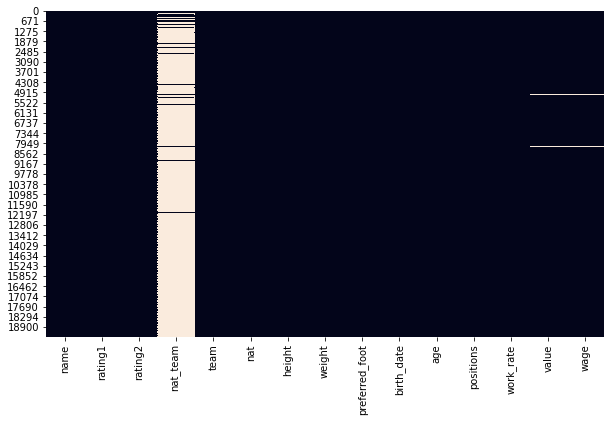

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull() ,cbar=False)

There are some missing values in "value" and "wage". I wiil have to drop the rows how are missing the "wage" varibale, it looks 
like the rows how are missing "wage" are missing "value" as well , if that isn't the case ill try later on to predict the wage for those rows. another thing we can see most rows are missing "nat_team" thats ok ,when i scraped the data from the website players how didnt play for nat_team i inserted null values. It makes sense that most playres dont play for a National team.

In [11]:
df.dropna(axis = 0 ,subset=['wage'] ,inplace=True)

In [12]:
df.dropna(axis = 0 ,subset=['team'] ,inplace=True)

Next thing im going to do is convert value, wage, hight and weight to ints types.
So ill be able to do EDA with them.

In [13]:
df['wage'] = df['wage'].apply(lambda x : int(x.replace("Wage","").replace(".","").replace("$","")))
df['value'] = df['value'].apply(lambda x : int(x.replace("Value","").replace(".","").replace("$","")))
df['height'] = df['height'].apply(lambda x : int(x.replace("cm","")))
df['weight'] = df['weight'].apply(lambda x : int(x.replace("kg","")))

Now im going to separate with a comma Between the positions.

In [14]:
def positon_func(string):
    postions_list = ['GK','SW','RWB','RB','CB','LB','LWB','CDM','RM','CM','LM','CAM','CF','RW','ST','LW']
    
    return_string=""
    
    for pos in postions_list:
        
        if string.find(pos) != -1:
            
            return_string = return_string + ',' + pos
            
    return return_string[1:]

In [15]:
df['positions'] = df['positions'].apply(positon_func)

In [16]:
df.drop('name' , axis=1,inplace=True)
df.reset_index(inplace=True,drop=True)
df

,rating1,rating2,nat_team,team,nat,height,weight,preferred_foot,birth_date,age,positions,work_rate,value,wage
0,94,94,Argentina,FC Barcelona,Argentina,170,72,Left,"June 24, 1987",33,"CF,RW,ST",Medium / Low,95500000,560000
1,93,93,Portugal,Juventus,Portugal,187,83,Right,"Feb. 5, 1985",35,"ST,LW",High / Low,58500000,400000
2,92,92,Brazil,Paris Saint-Germain,Brazil,175,68,Right,"Feb. 5, 1992",28,"CAM,LW",High / Medium,105500000,290000
3,91,92,Netherlands,Liverpool,Netherlands,193,92,Right,"July 8, 1991",29,CB,Medium / Medium,90000000,245000
4,91,93,Slovenia,Atlético Madrid,Slovenia,188,87,Right,"Jan. 7, 1993",27,GK,Medium / Medium,77500000,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,48,63,NaN,AIK,Sweden,177,63,Left,"April 29, 2002",18,CM,Medium / Medium,60000,1500
18896,48,62,NaN,Lyngby BK,Denmark,170,70,Left,"April 28, 2000",20,RW,Medium / Medium,60000,1500
18897,48,70,NaN,Lincoln City,England,174,69,Right,"Sept. 22, 2002",18,RB,Medium / Medium,60000,1500
18898,48,70,NaN,Derry City,England,179,74,Right,"June 21, 2002",18,CM,Medium / Medium,60000,1500


## 3)EDA

Im going to start with basic EDA and latter i'll try and answer a few interesting questions.

#### correlation matrix

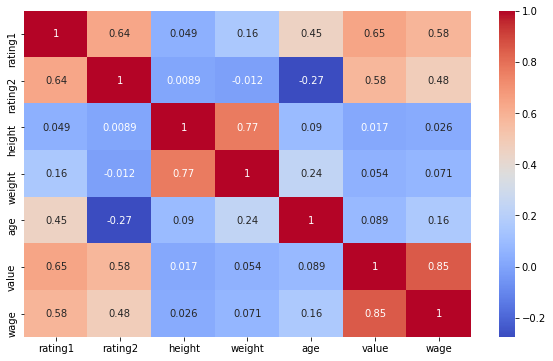

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr() ,annot=True , cmap="coolwarm")

#### pairplots

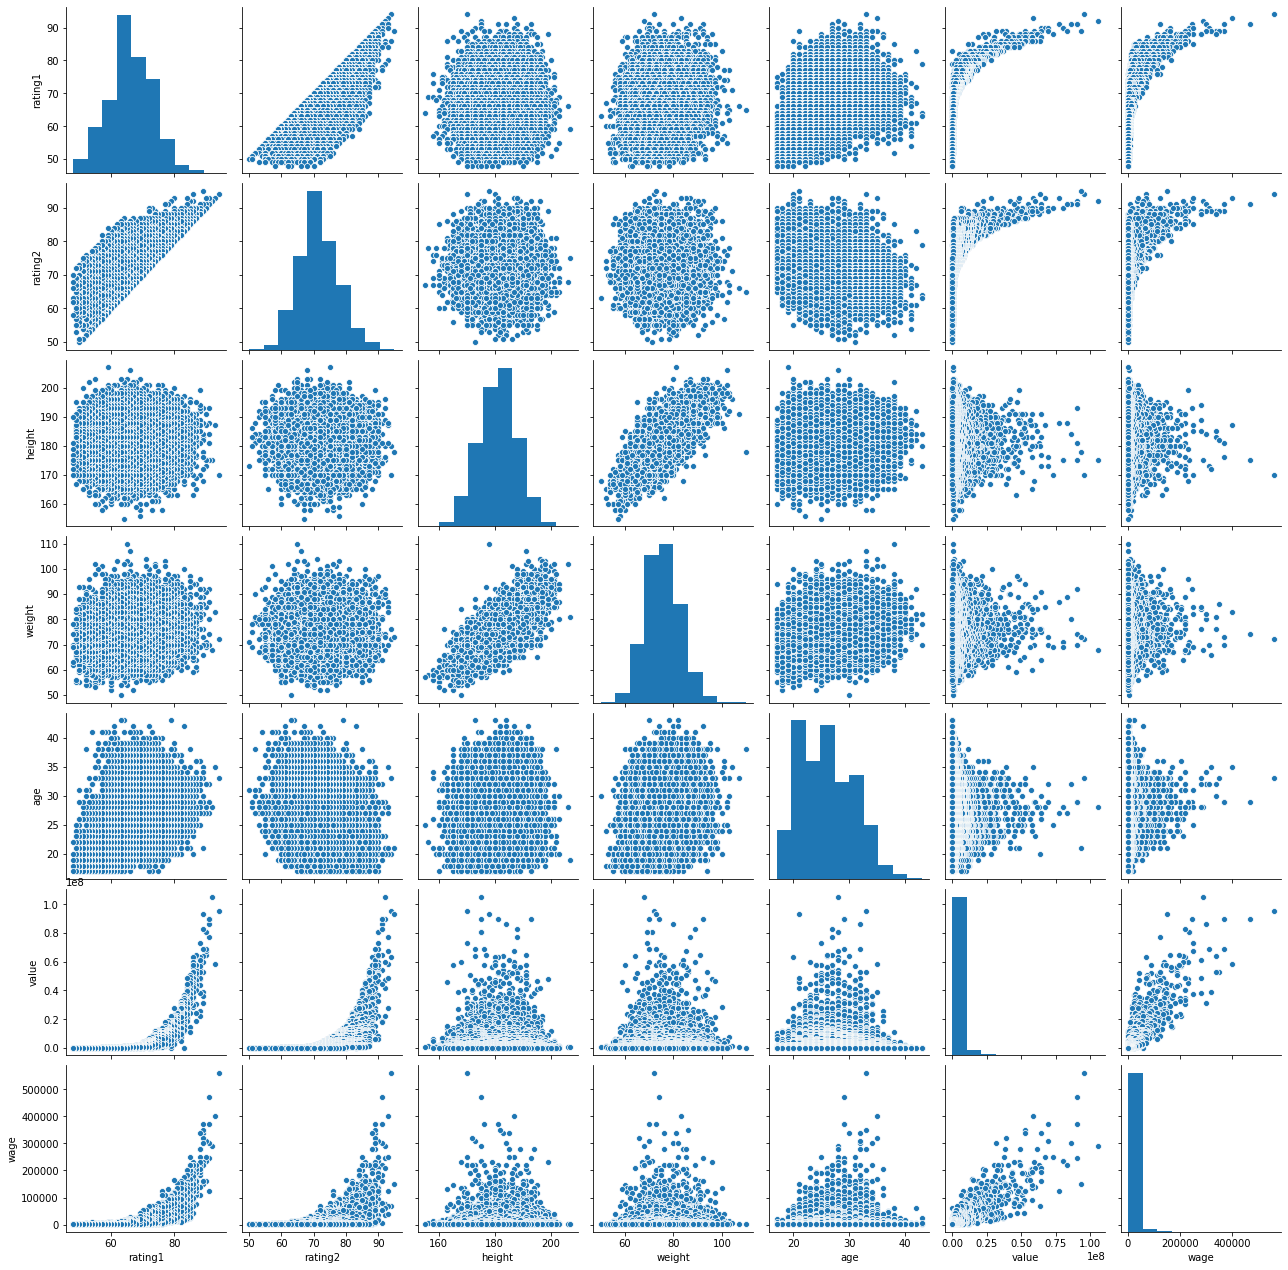

In [18]:

sns.pairplot(df)

#### distribution plots

In [19]:
sns.set_style('darkgrid')

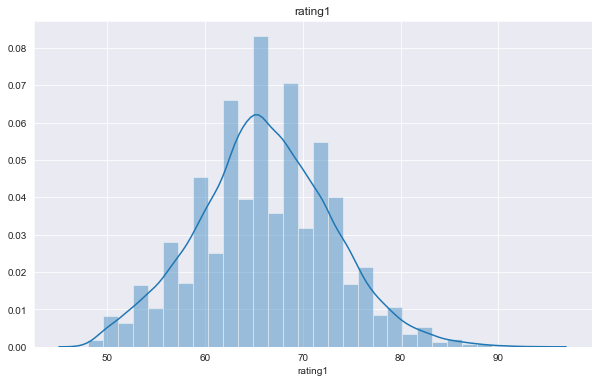

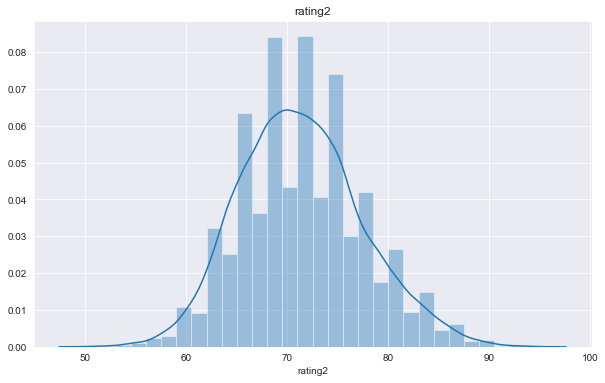

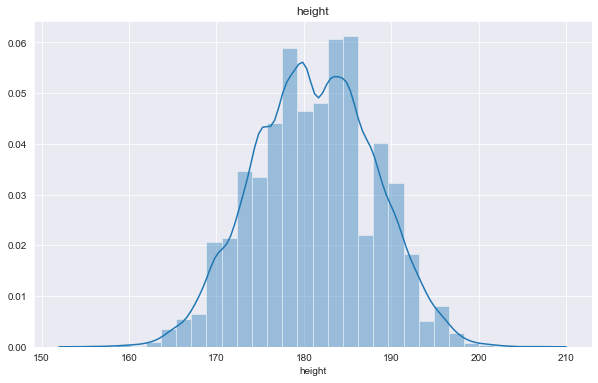

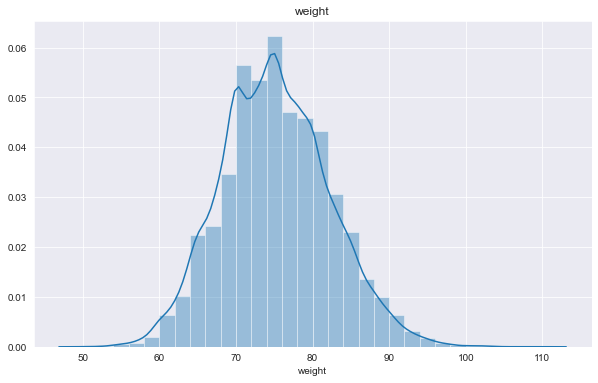

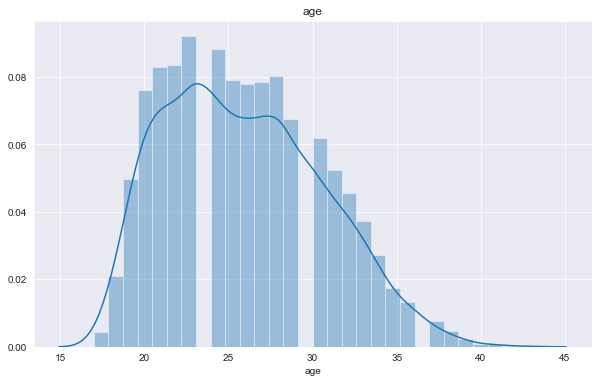

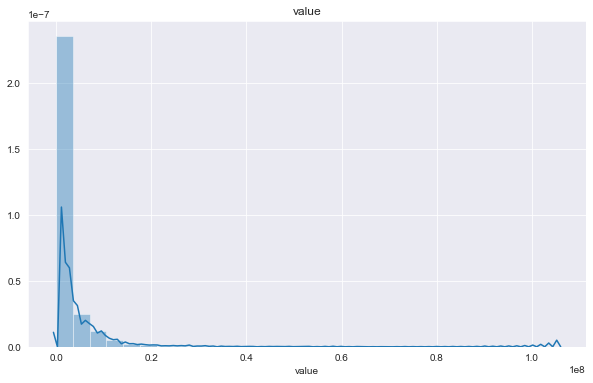

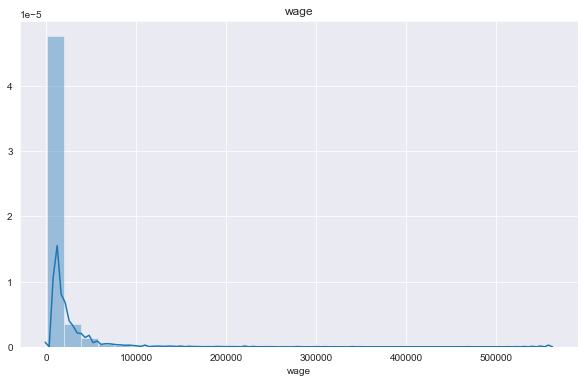

In [20]:
for var in df.describe().columns :
    
    plt.figure(figsize=(10,6))
    sns.distplot(df[var],bins=30)
    plt.title(var)
    plt.show()

### count plots

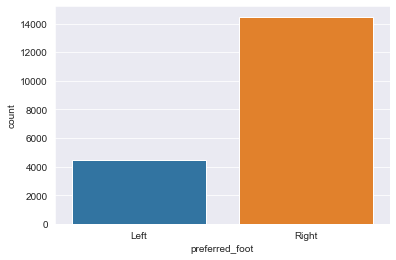

In [21]:
sns.countplot(df['preferred_foot'])

In [84]:

df['nat'].iplot(kind = 'histogram' , title = 'nationality')


Text(0.5, 1.0, 'work rate')

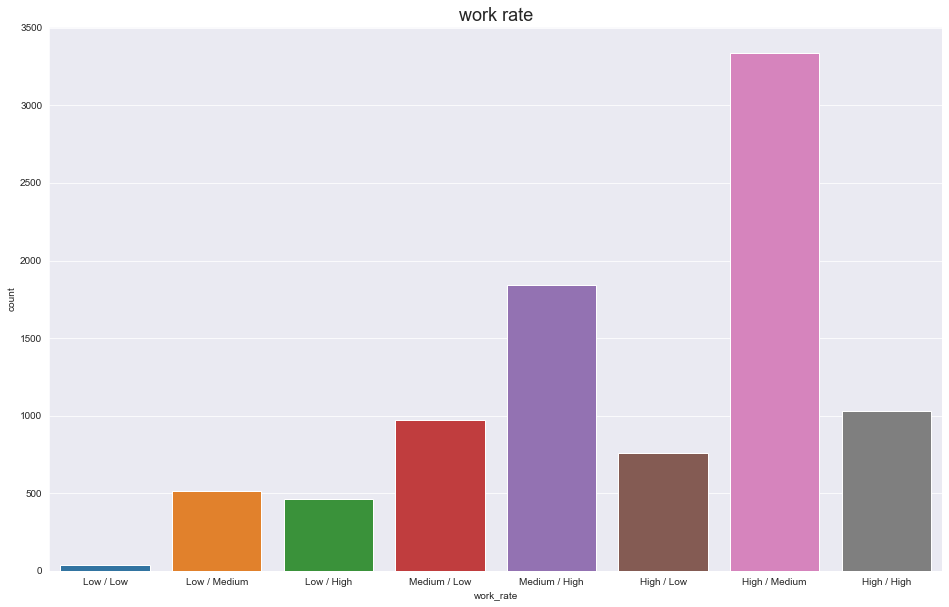

In [23]:
plt.figure(figsize=(16,10))
sns.countplot(df['work_rate'] , order=['Low / Low' , 'Low / Medium','Low / High' , 'Medium / Low' ,'Medium / High',
                                      'High / Low' , 'High / Medium' ,'High / High' ])
plt.title('work rate' , fontsize=18)

### thes or the qustions i would like to explore:
### 1.Which team pays the highest total salary to her players?
### 2.is there a connection between nationality and the player's salary?
### 3.what position has the potential to earn the highest salary?
### 4.is there a connection between palyers age and the player's salary?

## 1

In [24]:
group_by_team = df.groupby('team' )
group_by_team.sum()[group_by_team.sum()['wage'] == group_by_team.sum()['wage'].max()]

,rating1,rating2,height,weight,age,value,wage
team,,,,,,,
Real Madrid,2564,2737,5795,2450,828,872850000,5037200


## 2

In [25]:
group_by_nat = df.groupby('nat').mean().reset_index()

In [26]:
group_by_nat_count = df.groupby('nat').count()

In [27]:
nations = group_by_nat_count[group_by_nat_count['rating1']>=116.691358].reset_index()['nat']

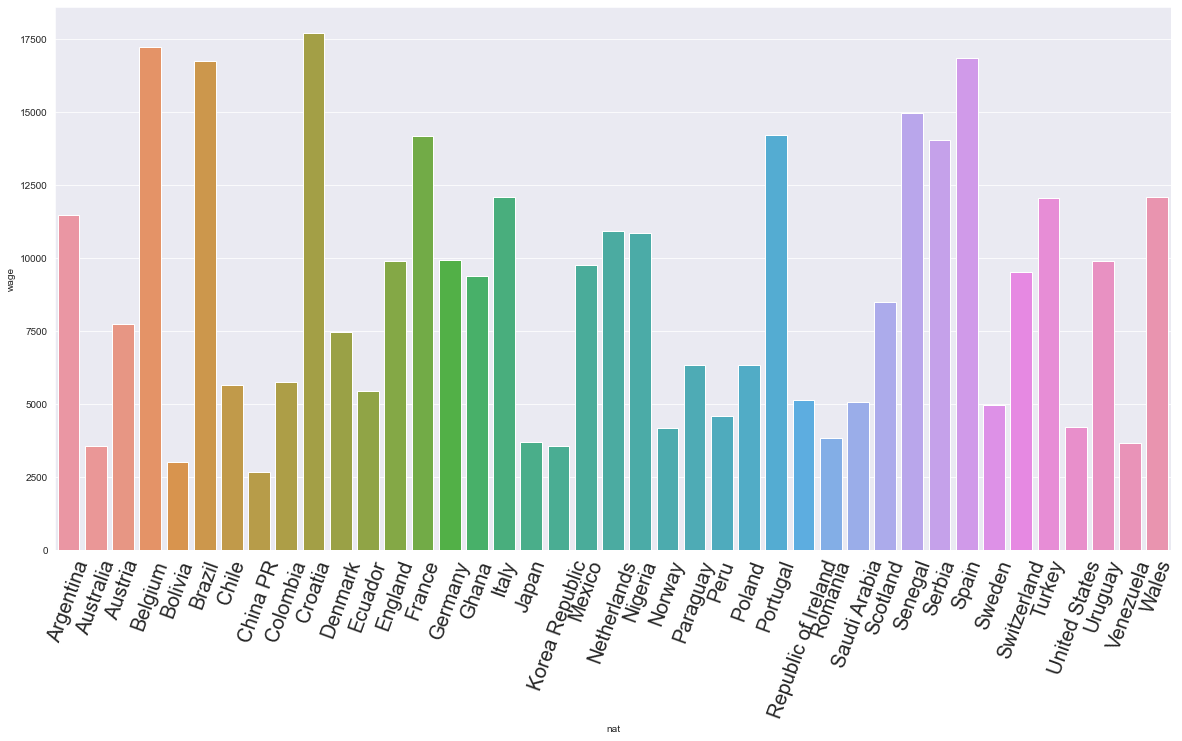

In [28]:
newdata = group_by_nat[group_by_nat['nat'].isin(nations)][['nat','wage']]

plt.figure(figsize=(20,10))
plt.xticks(rotation=70 , fontsize=20 )
sns.barplot(x = newdata['nat'] , y=newdata['wage'])

I decided first of all to take countries where the number of players is average and above.
You can see that there is really no trend ,Or a country / continent that has something special about them.So it does not seem to me that there is a connection between the palyers origin and his salary

## 3 

In [29]:
postions_salary = {'GK':0,'SW':0,'RWB':0,'RB':0 ,'CB':0,'LB':0,'LWB':0,'CDM':0,'RM':0,'CM':0,'LM':0,'CAM':0,'CF':0
                 ,'RW':0,'ST':0,'LW':0}

postions_count = {'GK':0,'SW':0,'RWB':0,'RB':0 ,'CB':0,'LB':0,'LWB':0,'CDM':0,'RM':0,'CM':0,'LM':0,'CAM':0,'CF':0
                 ,'RW':0,'ST':0,'LW':0}

for i in range(0,len(df)):

    postions = df['positions'].loc[i].split(",")
    
    for pos in postions :
        
        postions_salary[pos] = postions_salary[pos] + df.loc[i]['wage']
        postions_count[pos] = postions_count[pos] + 1
    

C:\Users\matan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in true_divide



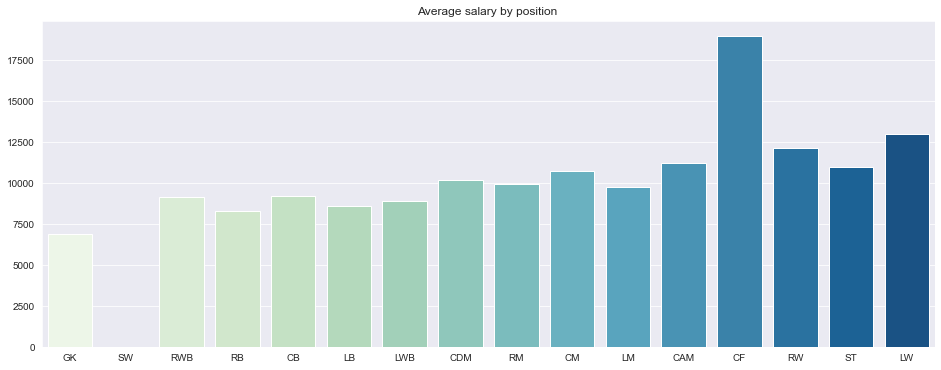

In [30]:
plt.figure(figsize=(16,6))
plt.title('Average salary by position ')
sns.barplot(x=list(postions_salary.keys()) , 
            y = np.array(list(postions_salary.values())) / np.array(list(postions_count.values())) , palette='GnBu')

we can see that offensive roles eran higher salarys ,especially in the "CF" positon.

## 4

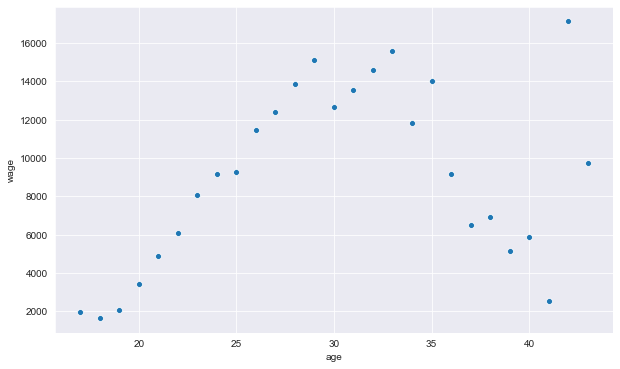

In [31]:
newdata = df.groupby('age').mean().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(x = newdata['age'] , y = newdata['wage'])

It can be seen that there is a strong connection between age and salary.wages reach a peak  around the age  of 30.

## 4) Feature Engineering

first thing im going to do is assign a column for each position and give it a binary value.
if player playes in that position -1
,else - 0 

In [33]:
postions_list = ['GK','SW','RWB','RB','CB','LB','LWB','CDM','RM','CM','LM','CAM','CF','RW','ST','LW']
for pos in postions_list :
    
    df[pos] = df['positions'].apply( lambda x: 1 if x.find(pos)!= -1 else 0)

In [34]:
df

,rating1,rating2,nat_team,team,nat,height,weight,preferred_foot,birth_date,age,...,LWB,CDM,RM,CM,LM,CAM,CF,RW,ST,LW
0,94,94,Argentina,FC Barcelona,Argentina,170,72,Left,"June 24, 1987",33,...,0,0,0,0,0,0,1,1,1,0
1,93,93,Portugal,Juventus,Portugal,187,83,Right,"Feb. 5, 1985",35,...,0,0,0,0,0,0,0,0,1,1
2,92,92,Brazil,Paris Saint-Germain,Brazil,175,68,Right,"Feb. 5, 1992",28,...,0,0,0,0,0,1,0,0,0,1
3,91,92,Netherlands,Liverpool,Netherlands,193,92,Right,"July 8, 1991",29,...,0,0,0,0,0,0,0,0,0,0
4,91,93,Slovenia,Atlético Madrid,Slovenia,188,87,Right,"Jan. 7, 1993",27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,48,63,NaN,AIK,Sweden,177,63,Left,"April 29, 2002",18,...,0,0,0,1,0,0,0,0,0,0
18896,48,62,NaN,Lyngby BK,Denmark,170,70,Left,"April 28, 2000",20,...,0,0,0,0,0,0,0,1,0,0
18897,48,70,NaN,Lincoln City,England,174,69,Right,"Sept. 22, 2002",18,...,0,0,0,0,0,0,0,0,0,0
18898,48,70,NaN,Derry City,England,179,74,Right,"June 21, 2002",18,...,0,0,0,1,0,0,0,0,0,0


### Prep categorical variables

Before I convert to numeric values I need to handle the NaN values in nat_team col.
im going to insert instead of null values - "no_team" category. 

In [35]:
df['nat_team'].fillna(value = "no_team" , inplace = True)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
cat_features = [ 'nat_team','team', 'nat','preferred_foot','work_rate']
encoder = LabelEncoder()

# Apply the label encoder to each column
encoded = df[cat_features].apply(encoder.fit_transform)

In [39]:
encoded

,nat_team,team,nat,preferred_foot,work_rate
0,4,255,5,0,7
1,86,389,122,1,1
2,12,504,19,1,2
3,79,430,105,1,8
4,103,65,134,1,8
...,...,...,...,...,...
18895,126,15,141,0,8
18896,126,437,41,0,8
18897,126,429,46,1,8
18898,126,229,46,1,8


## 5) Data Preprocessing for Model

In [40]:
df.columns

Index(['rating1', 'rating2', 'nat_team', 'team', 'nat', 'height', 'weight',
       'preferred_foot', 'birth_date', 'age', 'positions', 'work_rate',
       'value', 'wage', 'GK', 'SW', 'RWB', 'RB', 'CB', 'LB', 'LWB', 'CDM',
       'RM', 'CM', 'LM', 'CAM', 'CF', 'RW', 'ST', 'LW'],
      dtype='object')

In [41]:
data1=df[['rating1', 'rating2', 'height', 'weight',
        'age','GK', 'SW', 'RWB', 'RB', 'CB', 'LB', 'LWB', 'CDM',
       'RM', 'CM', 'LM', 'CAM', 'CF', 'RW', 'ST', 'LW',
       'value', 'wage']]

In [42]:
data = pd.concat([encoded,data1],axis=1)

In [43]:
data

,nat_team,team,nat,preferred_foot,work_rate,rating1,rating2,height,weight,age,...,RM,CM,LM,CAM,CF,RW,ST,LW,value,wage
0,4,255,5,0,7,94,94,170,72,33,...,0,0,0,0,1,1,1,0,95500000,560000
1,86,389,122,1,1,93,93,187,83,35,...,0,0,0,0,0,0,1,1,58500000,400000
2,12,504,19,1,2,92,92,175,68,28,...,0,0,0,1,0,0,0,1,105500000,290000
3,79,430,105,1,8,91,92,193,92,29,...,0,0,0,0,0,0,0,0,90000000,245000
4,103,65,134,1,8,91,93,188,87,27,...,0,0,0,0,0,0,0,0,77500000,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,126,15,141,0,8,48,63,177,63,18,...,0,1,0,0,0,0,0,0,60000,1500
18896,126,437,41,0,8,48,62,170,70,20,...,0,0,0,0,0,1,0,0,60000,1500
18897,126,429,46,1,8,48,70,174,69,18,...,0,0,0,0,0,0,0,0,60000,1500
18898,126,229,46,1,8,48,70,179,74,18,...,0,1,0,0,0,0,0,0,60000,1500


In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('wage' , axis =1) , data['wage'],test_size=0.30 )

## 6) Basic Model Building

Before going further, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation to get a baseline.

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression ,Lasso
from sklearn.ensemble import RandomForestRegressor

In [141]:
lr = LinearRegression()
cv = cross_val_score(lr,X_train,y_train,scoring = 'neg_mean_absolute_error',cv = 5)
print(cv)
print(cv.mean())

[-4694.69285619 -4448.63110147 -4479.88083812 -4627.97699123
 -4711.38358294]
-4592.51307399104


In [142]:
rf = RandomForestRegressor(n_estimators=200)
cv = cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error' )
print(cv)
print(cv.mean())

[-3814.64172336 -3748.2212774  -3637.64021164 -3743.55839002
 -3928.62773998]
-3774.5378684807256


In [143]:
#lasso regression
lm_l =Lasso()

lr = LinearRegression()
cv = cross_val_score(lm_l,X_train,y_train,scoring = 'neg_mean_absolute_error',cv = 5)
print(cv)
print(cv.mean())

[-4691.64673178 -4446.2057557  -4477.75735729 -4625.82707172
 -4708.33515261]
-4589.954413819951


## 7) Model Tuning

### RandomForestRegressor

In [150]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [162]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [163]:
# i tried to run gridsearch but it toke to long.
gs = RandomizedSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3,n_jobs=4)
gs.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=199),
                   n_jobs=4,
                   param_distributions={'criterion': ('mse', 'mae'),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'n_estimators': range(10, 300, 10)},
                   scoring='neg_mean_absolute_error')

In [176]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=240)

In [154]:
error = []
n_est = []

for i in range(1,200):



    rf = RandomForestRegressor(n_estimators=i)
    cv = cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error' )

    error.append(cv.mean)
    n_est.append(i)
    
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


Text(0, 0.5, 'error')

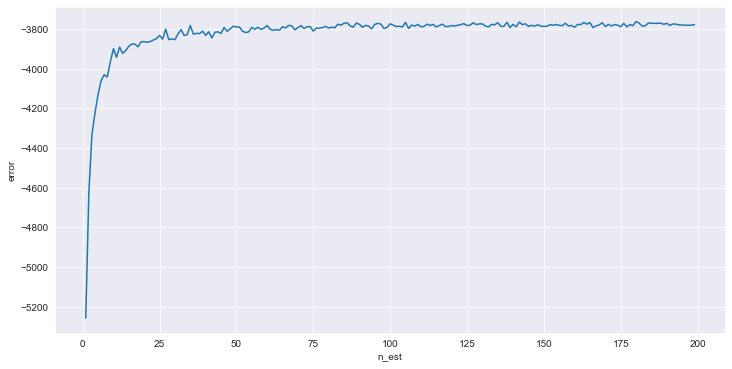

In [182]:
error_list = [error[i]() for i in range(0,len(error))]
plt.figure(figsize=(12,6))
plt.plot(n_est,error_list)
plt.xlabel('n_est')
plt.ylabel('error')


In [178]:
print(max(error_list))
print(n_est[error_list.index(max(error_list))])

-3762.798227933148
180


### lasso regression

,alpha,error
47,4800.0,-4319.310333


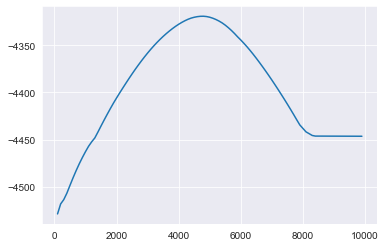

In [186]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/0.01)
    lml = Lasso(alpha=(i/0.01))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [193]:
# Create a function called lasso,
def lasso(alphas , X_train ,y_train):
    
    names = X_train.columns
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X_train, y_train)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

In [196]:
lasso([0,1000,4800,6000] , X_train,y_train)

C:\Users\matan\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\matan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\matan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 677543715354.1534, tolerance: 546224566.9681784



,Feature Name,Alpha = 0.000000,Alpha = 1000.000000,Alpha = 4800.000000,Alpha = 6000.000000
0,nat_team,-10.411409,-5.091205,-0.000000,-0.000000
1,team,-0.429634,-0.347200,-0.251452,-0.230802
2,nat,1.995650,1.858646,0.000000,0.000000
3,preferred_foot,334.918239,0.000000,0.000000,0.000000
4,work_rate,66.697259,0.000000,-0.000000,-0.000000
5,rating1,-114.083651,0.000000,0.000000,0.000000
6,rating2,220.505916,51.796764,0.000000,0.000000
7,height,25.587016,0.000000,0.000000,0.000000
8,weight,10.032922,2.292345,0.000000,0.000000
9,age,535.271055,346.732943,151.538663,96.479379


## 8) Results

I tried three different models and evaluated them using Mean Absolute Error.
I tried three different models:
* 1 Multiple Linear Regression – Baseline for the model
* Lasso Regression
* Random Forest 

### Model performance

The Random Forest model far outperformed the other approaches on the test set.

* **Random Forest** : MAE = 1492.58
* Linear Regression: MAE = 4699.44
* Lasso Regression: MAE = 4444.51

In [200]:
#lasso 
lml = Lasso(alpha=4800)

In [202]:
lml.fit(X_train,y_train)

Lasso(alpha=4800)

In [221]:
y_perd = lml.predict(X_test)

In [212]:
from sklearn.metrics import mean_absolute_error

In [213]:
mean_absolute_error(y_test , y_perd)

4444.519862454384

In [223]:
#randomforest
rf = RandomForestRegressor(n_estimators=180)
rf.fit(X_test,y_test)
y_perd = rf.predict(X_test)

In [224]:
mean_absolute_error(y_test , y_perd)

1492.589261218891

In [229]:
#liner model
lm = LinearRegression()
lm.fit(X_train, y_train)
y_perd = lm.predict(X_test)
mean_absolute_error(y_test , y_perd)


4699.443052117508